In [1]:
# %load /cluster/home/myurchikova/github/projects2020_ohsu/eth/learning_Master_thesis/TASKS/func/base_imports.py
import pandas as pd
import numpy as np
import tqdm 
import glob
import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import tarfile
import re
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib_venn import venn3, venn3_circles
import sys
sys.path.append(r"/cluster/home/myurchikova/github/projects2020_ohsu/eth/learning_Master_thesis/TASKS/func")
from config import *
from functions import *



In [2]:
# Loading data

out_df_original = pd.read_csv(f'{SAVE_DIR}/{DIR_CSV}/{DIR_OVARIAN}/{NAME_TABLES}/{NAME_NON_FILTERING_OVARIAN}', sep="\t",low_memory=False)
out_df_filtered = pd.read_csv(f'{SAVE_DIR}/{DIR_CSV}/{DIR_OVARIAN}/{NAME_TABLES}/{NAME_FILTERING_OVARIAN}', sep=";",low_memory=False)

In [3]:
# Import requirements for fonts
import matplotlib
matplotlib.rcParams.update({'font.size':4})
import math

In [4]:
# Processing tables & save tables
first_df=out_df_filtered
second_df=out_df_original
final_df = first_df

# Adding sum for simple filtration
out_df_filtered.insert(loc=4,column='sum',value=final_df['size_intersection_coor']+final_df['size_ohsu\eth_coor']+final_df['size_eth\ohsu_coor'])
out_df_filtered.head()

final_path = create_path.create_path(SAVE_DIR,[DIR_CSV,DIR_OVARIAN,NAME_TABLES,NAME_FINAL_OVARIAN])

final_df.to_csv(final_path,header=True,sep='\t')

/cluster/home/myurchikova/github/projects2020_ohsu/eth/learning_Master_thesis/TASKS/func/functions/table_processing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.sort_values(['size_intersection', 'priority'], inplace = True,ascending = [False, True])


<Figure size 640x480 with 0 Axes>

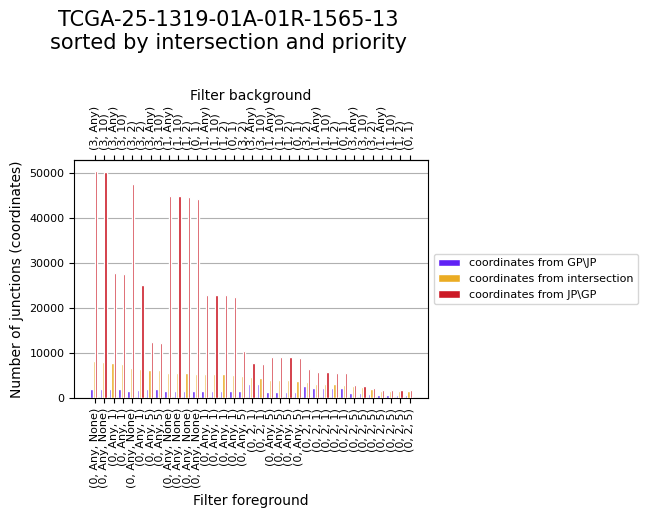

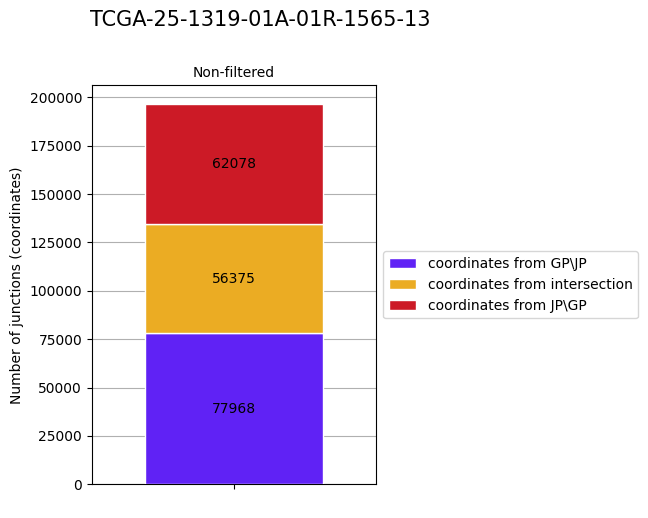

/cluster/home/myurchikova/github/projects2020_ohsu/eth/learning_Master_thesis/TASKS/func/functions/table_processing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.sort_values(['size_intersection', 'priority'], inplace = True,ascending = [False, True])


<Figure size 640x480 with 0 Axes>

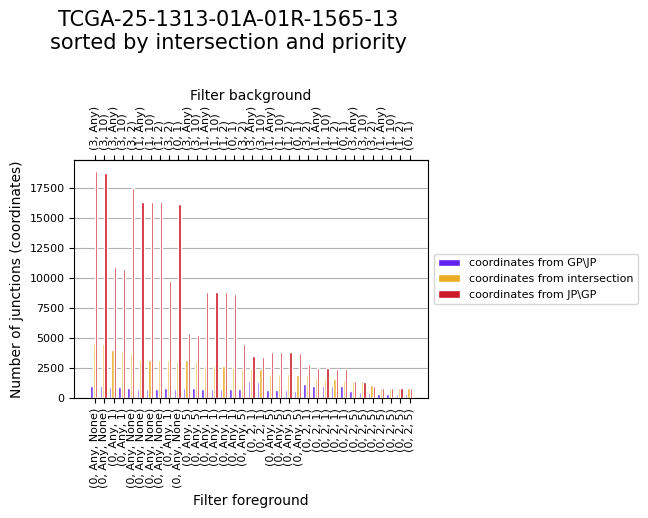

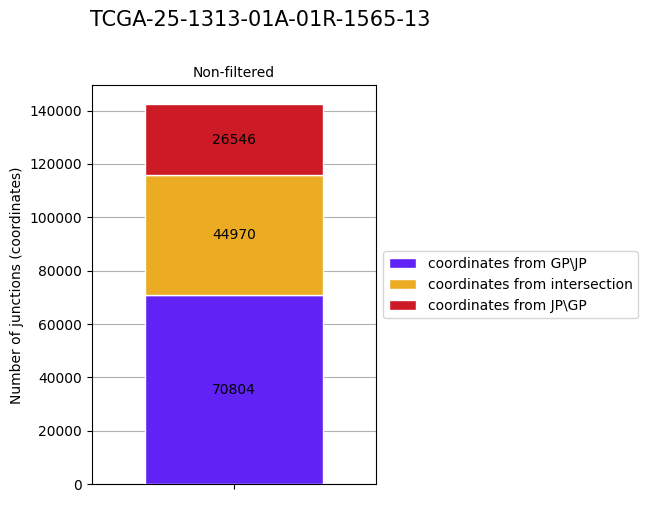

/cluster/home/myurchikova/github/projects2020_ohsu/eth/learning_Master_thesis/TASKS/func/functions/table_processing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.sort_values(['size_intersection', 'priority'], inplace = True,ascending = [False, True])


<Figure size 640x480 with 0 Axes>

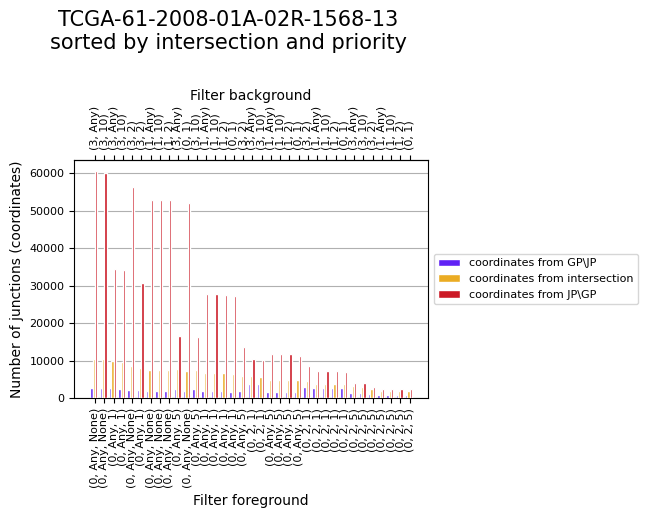

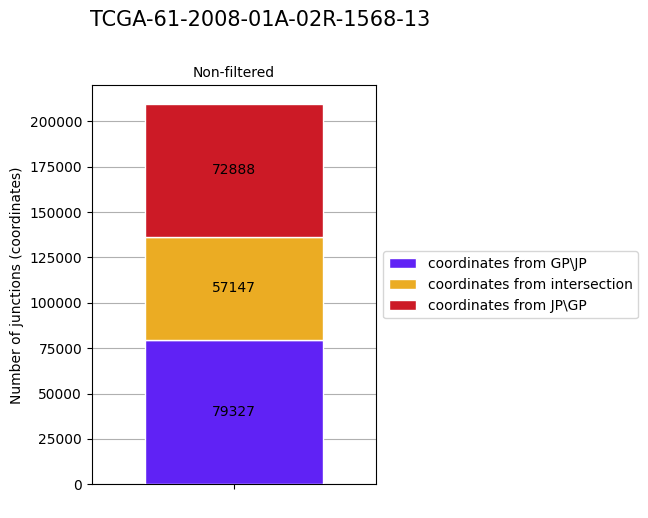

/cluster/home/myurchikova/github/projects2020_ohsu/eth/learning_Master_thesis/TASKS/func/functions/table_processing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.sort_values(['size_intersection', 'priority'], inplace = True,ascending = [False, True])


<Figure size 640x480 with 0 Axes>

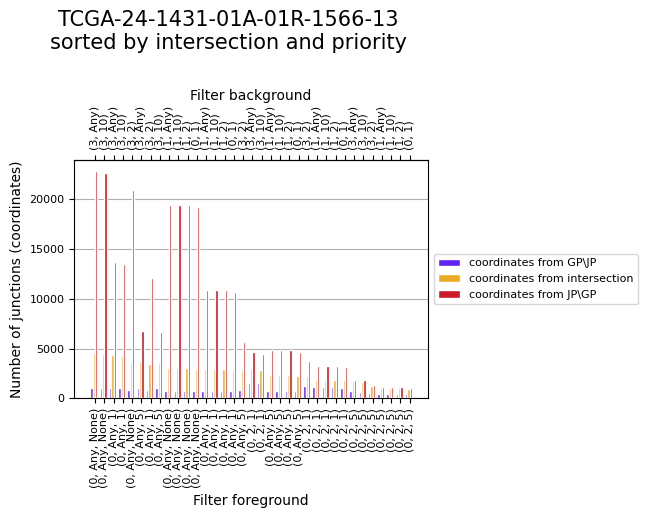

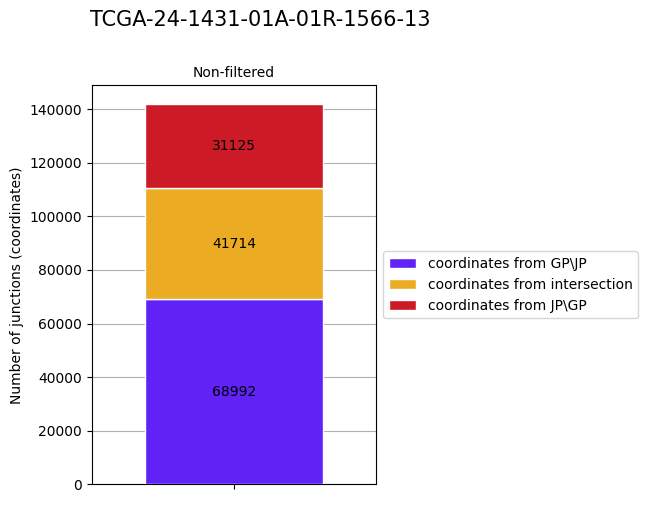

/cluster/home/myurchikova/github/projects2020_ohsu/eth/learning_Master_thesis/TASKS/func/functions/table_processing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.sort_values(['size_intersection', 'priority'], inplace = True,ascending = [False, True])


<Figure size 640x480 with 0 Axes>

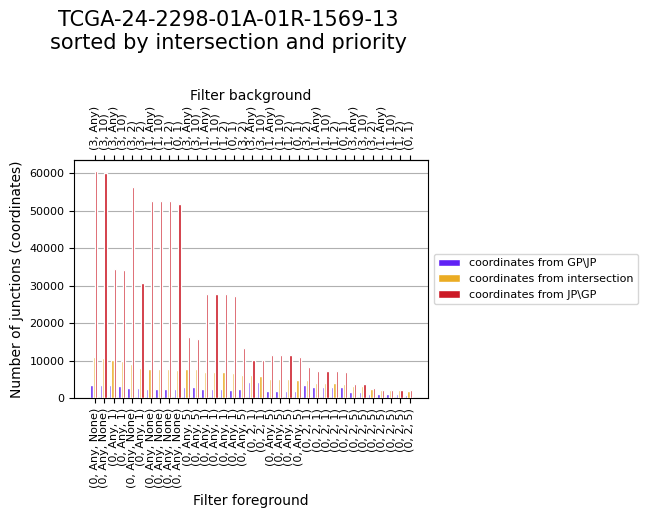

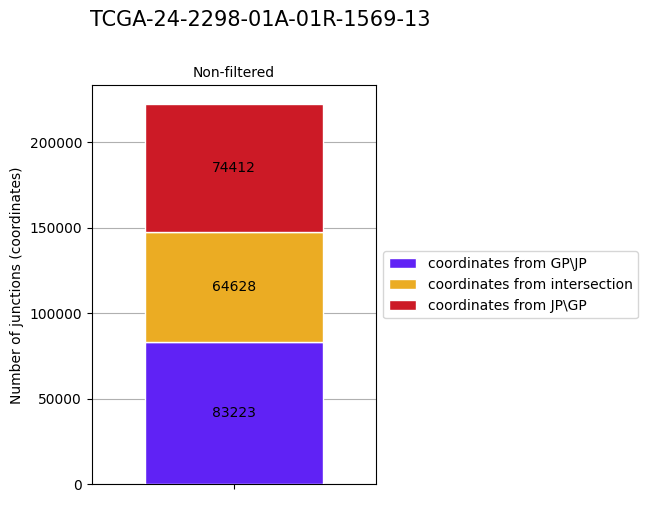

In [5]:
import matplotlib
from matplotlib.ticker import ScalarFormatter
matplotlib.rcParams.update({'font.size':4})
# Definition constants
import math        
        
# Choose necessary data from tables and concatenate filtered & non-filtered cleared tables in one format.
first_df=out_df_filtered
second_df=out_df_original

final_df = first_df
diff_tab=pd.DataFrame()
# Processing data and drawing grahs for each sample
for sample in RESTRICTS_OVARIAN:
    # Download colums from tables
    data_df = final_df.loc[(final_df['sample']==sample)]
    data_df=table_processing.sorting(data_df)
    
    inter=list(data_df['size_intersection_coor'])
    s_ETH=list(data_df['size_eth\ohsu_coor'])
    s_OHSU=list(data_df['size_ohsu\eth_coor'])
    
    filter_foreground = list(data_df['filter_foreground'])
    filter_background = list(data_df['filter_background'])
    
    inter2=list(second_df['size_intersection_coor'].loc[(second_df['sample']==sample)])
    s_ETH2=list(second_df['size_eth\ohsu_coor'].loc[(second_df['sample']==sample)])
    s_OHSU2=list(second_df['size_ohsu\eth_coor'].loc[(second_df['sample']==sample)])
    filfor2 = ['']
    filbac2 = ['']
        # # Get data to compare 
    inter2_df=out_df_original['inter_coor'].loc[(out_df_original['sample']==sample)]
    OHSU_2_df=out_df_original['ohsu_coor\eth_coor'].loc[(out_df_original['sample']==sample)]
    ETH_2_df=out_df_original['eth_coor\ohsu_coor'].loc[(out_df_original['sample']==sample)]

    inter_nf=inter2_df.iloc[0]
    ohsu_nf=OHSU_2_df.iloc[0]
    eth_nf=ETH_2_df.iloc[0]
    
    inter_nf=inter_nf.replace('"','').replace("{","").replace("}","").replace("[","").replace("]","").replace("'","").split(', ')
    ohsu_nf=ohsu_nf.replace('"','').replace("{","").replace("}","").replace("[","").replace("]","").replace("'","").split(', ')
    eth_nf=eth_nf.replace('"','').replace("{","").replace("}","").replace("[","").replace("]","").replace("'","").split(', ')
    OSHU=out_df_filtered['ohsu_coor\eth_coor'].loc[(out_df_filtered['sample']==sample)]
    ETH=out_df_filtered['eth_coor\ohsu_coor'].loc[(out_df_filtered['sample']==sample)]
    
    len_ohsu = [len(ohsu_list) for ohsu_list in OSHU]
    f=final_df.loc[(final_df['sample']==sample)]['filter']

 

    ySalt=''
    
    l=len(s_ETH)
    filfor = filter_foreground
    filbac = filter_background
    tab={
         'sample':[],
         'filter':[],
         'JP from Inter NF':[],
         'JP from JP NF':[],
         'GP from Inter NF':[],
         'GP from GP NF':[],
         'ff':filfor,
         'fb':filbac,
         }
       # Conver Aray in DF to DF structure and compare intersection coordinates in filter with intersection coordinates without filter
    for ohsu, filter in zip(OSHU, f):
        ohsu=ohsu.replace('"','').replace("{","").replace("}","").replace("[","").replace("]","").replace("'","").split(', ')

        inter_d=len(inter_d_set:=(set(ohsu) & set(inter_nf)))
        ohsu_d=len(ohsu_d_set:=(set(ohsu) & set(ohsu_nf)))
        ohsu_out=list(set(ohsu).difference(inter_d_set))
        inter_out=list(set(ohsu).difference(ohsu_d_set))
        tab['sample'].append(sample)
        tab['filter'].append(filter)
        tab['JP from Inter NF'].append(inter_d)
        tab['JP from JP NF'].append(ohsu_d)

        salt=set(ohsu).difference(set(ohsu_nf))
    
    for eth, filter in zip(ETH, f):
        eth=eth.replace('"','').replace("}","").replace("{","").replace("[","").replace("]","").replace("'","").split(', ')
        inter_d=len(inter_d_set:=(set(eth) & set(inter_nf)))
        eth_d=len(eth_d_set:=(set(eth) & set(eth_nf)))
        eth_out=list(set(eth).difference(inter_d_set))
        inter_out=list(set(eth).difference(eth_d_set))
        tab['GP from Inter NF'].append(inter_d)
        tab['GP from GP NF'].append(eth_d)
        salt=set(eth).difference(set(eth_nf))
    tab=pd.DataFrame(tab)
    diff_tab=pd.concat([diff_tab,tab])
    
    fffb1=[]
    for i in range(len(filfor)):
          fffb1.append(filfor[i]+' '+filbac[i])
       
    fffb2=[]
    for i in range(len(filfor2)):
          fffb2.append(filfor2[i]+' '+filbac2[i])
    
    # Frame structure building
    name = ['coordinates from GP\JP','coordinates from intersection', 'coordinates from JP\GP']
    v = [s_ETH, inter, s_OHSU]
    axis2 = {
            'coordinates from GP\JP':s_ETH2,
            'coordinates from intersection':inter2,
            'coordinates from JP\GP':s_OHSU2
            }
     
    salt ='sorted by intersection and priority'
    SALT=''
    lg = len(filfor)
    lg2 = len(filfor2)
    #Plotting sample data
    
    x_main = filfor
    x_secondary = filbac
    x_secondary2 = filbac2
    
    plt.figure()

    bottom =np.zeros(lg)
    bottom2 =np.zeros(lg2)
    bar_width=0.5
    bar_position_ETH = range(len(s_ETH))

    bar_position_ETH2 = range(len(axis2['coordinates from GP\JP']))

    path_sample_absolut =create_path.create_path(SAVE_DIR, [DIR_CSV,DIR_OVARIAN,NAME_SAMPLES, sample,'coordinates', SALT,PLOT_TYPE, NAME_PLOT_ABSOLUT_PRETTY+PNG])
    path_sample_absolut_pdf =create_path.create_path(SAVE_DIR, [DIR_CSV,DIR_OVARIAN,NAME_SAMPLES, sample,'coordinates', SALT,PLOT_TYPE, NAME_PLOT_ABSOLUT_PRETTY+PDF])
    path_sample_nf =create_path.create_path(SAVE_DIR, [DIR_CSV,DIR_OVARIAN,NAME_SAMPLES, sample,'coordinates', SALT,PLOT_TYPE, NAME_PLOT_ABSOLUT_PRETTY_NF+PNG])
    path_sample_nf_pdf =create_path.create_path(SAVE_DIR, [DIR_CSV,DIR_OVARIAN,NAME_SAMPLES, sample,'coordinates', SALT,PLOT_TYPE, NAME_PLOT_ABSOLUT_PRETTY_NF+PDF])


    draw_plot.plotting_filtering_barplot(s_ETH,v,name,bottom,bar_position_ETH,sample,filfor,x_secondary,salt,path_sample_absolut,path_sample_absolut_pdf)

    # Plot 2  
    draw_plot.plotting_nf_barplot(axis2,fffb2,bottom2,sample,path_sample_nf,path_sample_nf_pdf)
    

<Figure size 640x480 with 0 Axes>

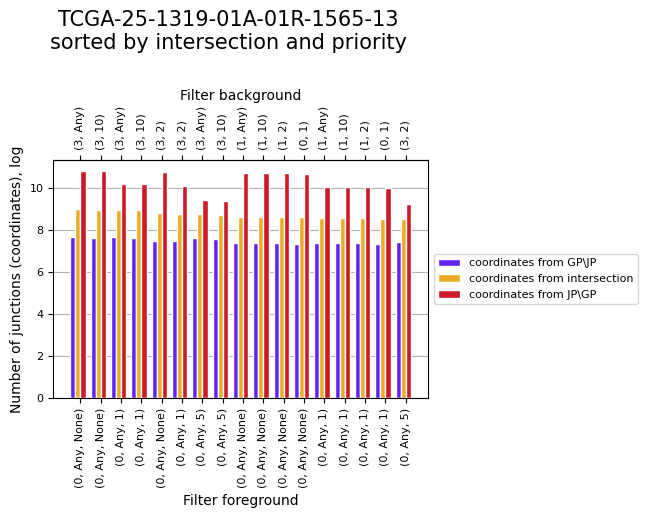

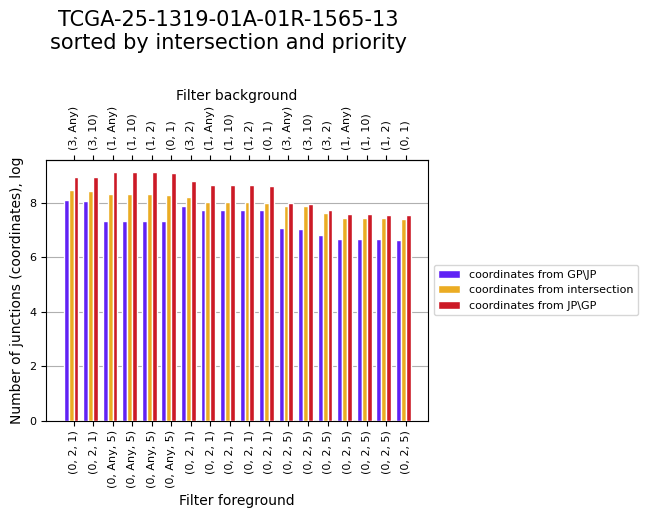

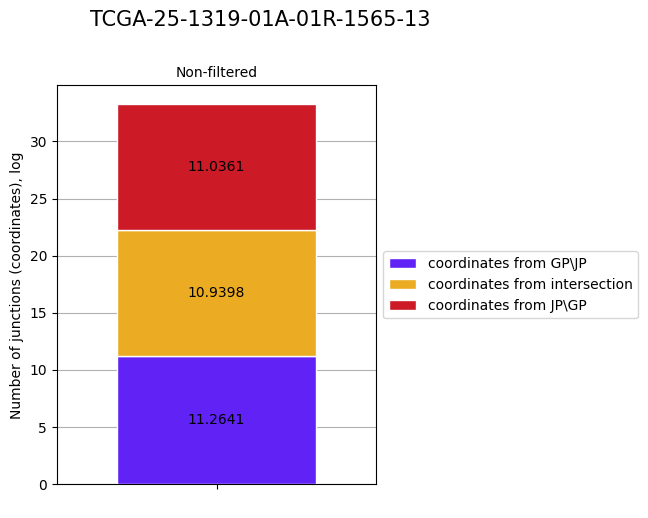

<Figure size 640x480 with 0 Axes>

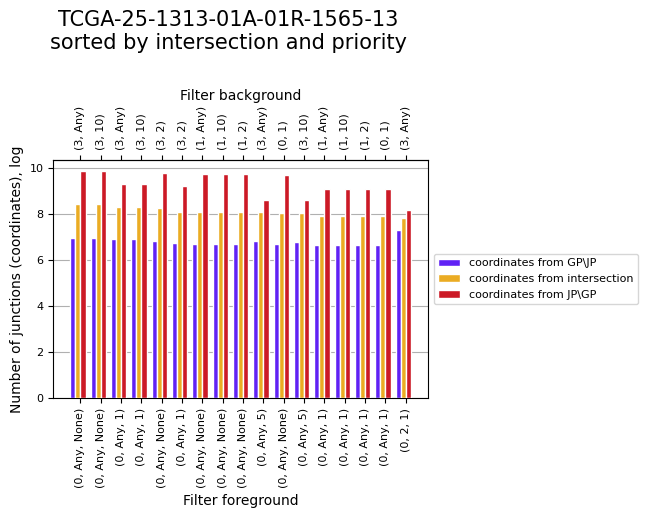

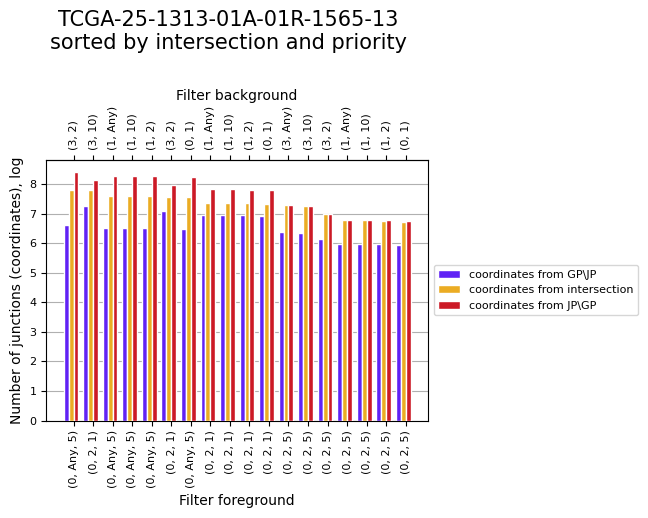

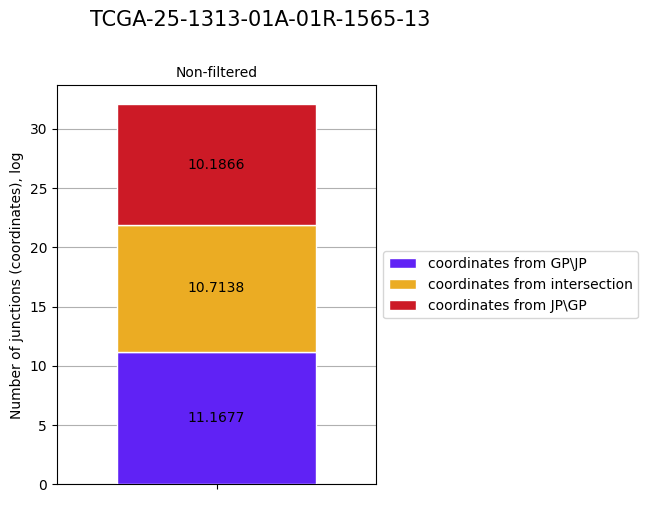

<Figure size 640x480 with 0 Axes>

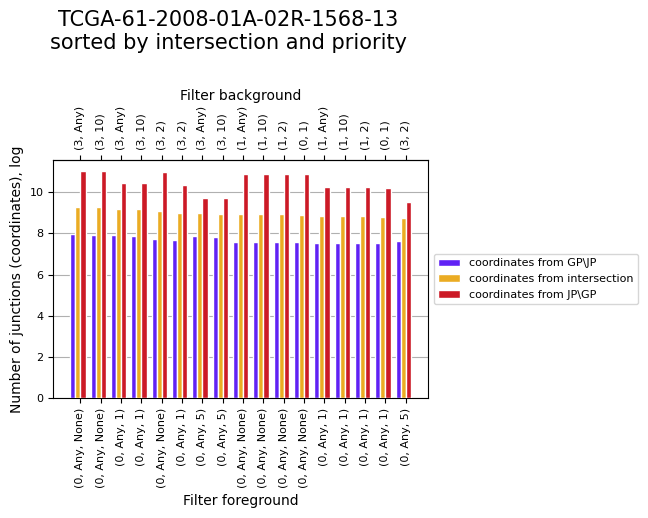

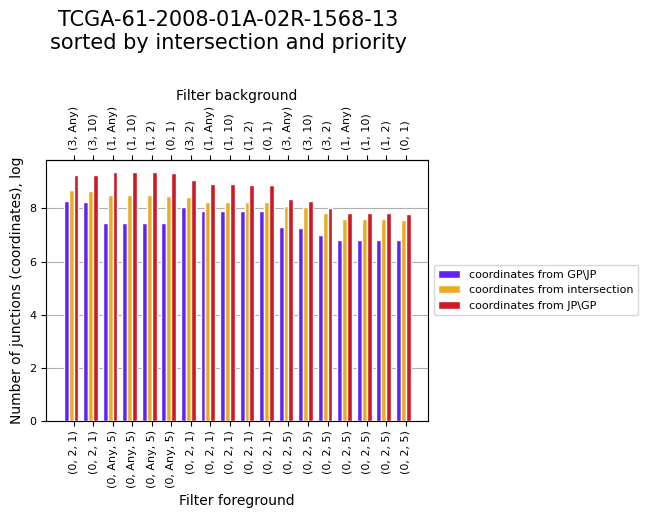

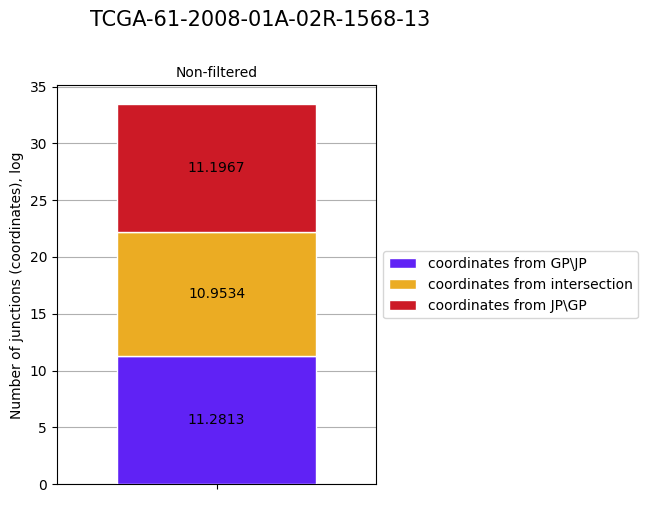

<Figure size 640x480 with 0 Axes>

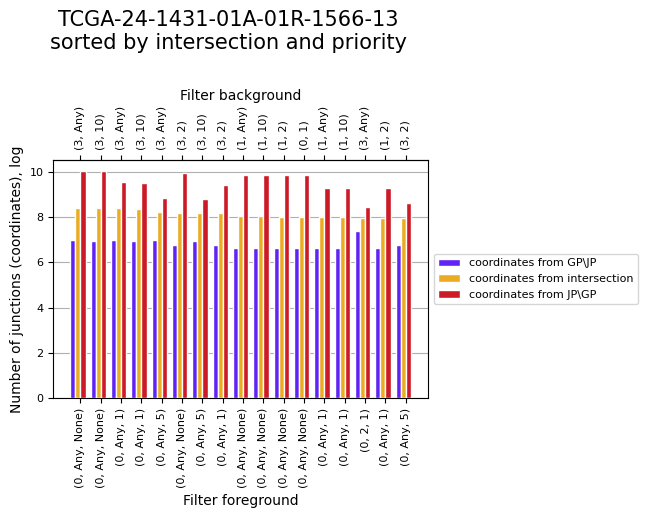

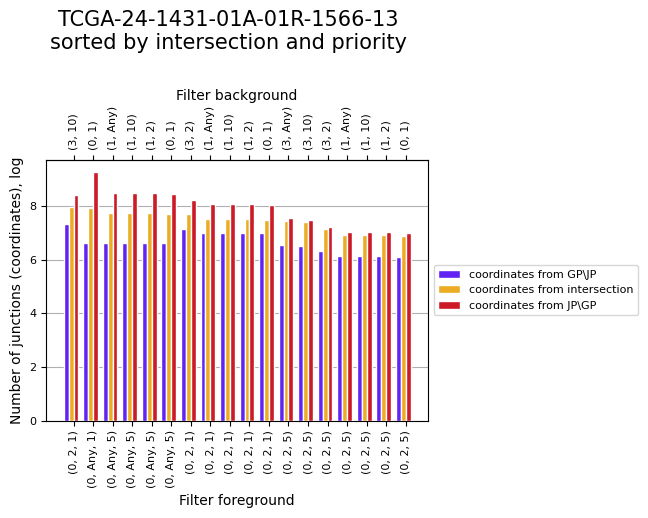

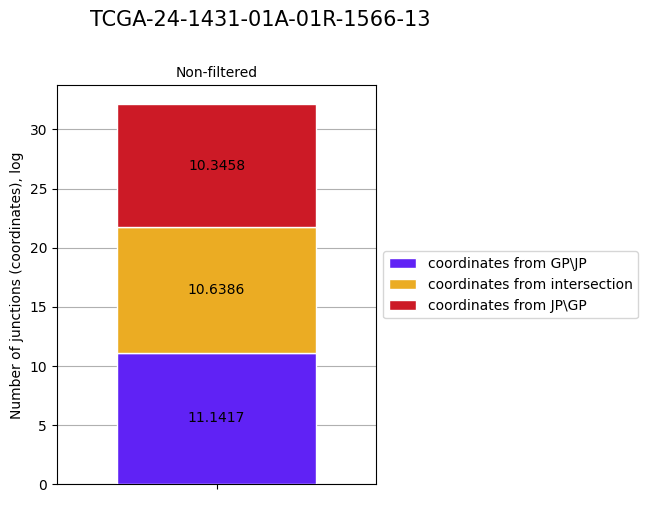

<Figure size 640x480 with 0 Axes>

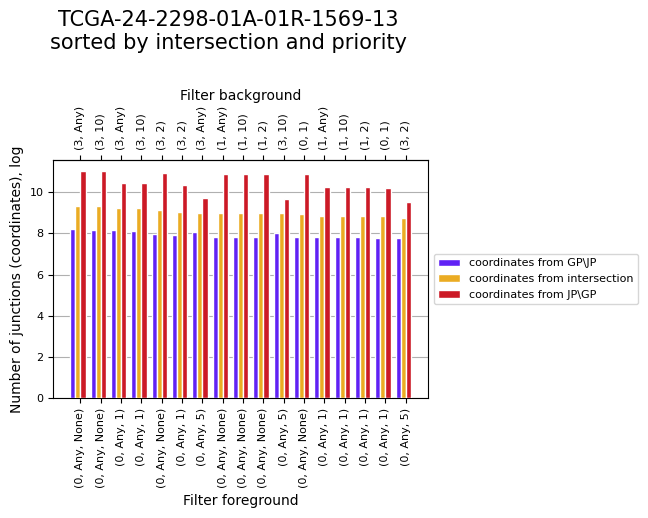

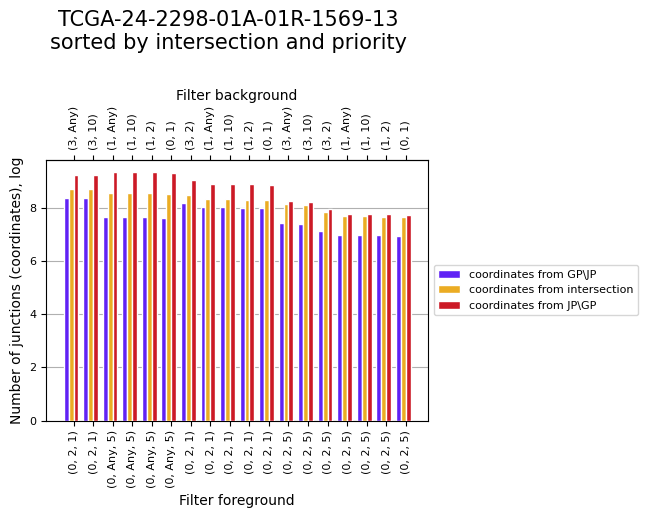

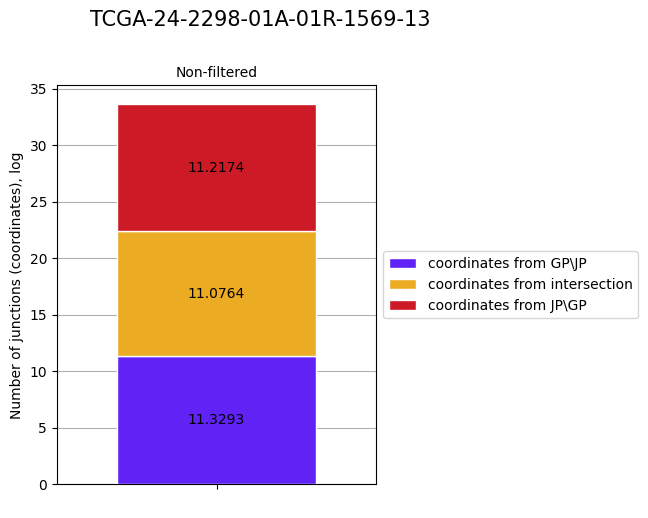

In [10]:
# WITH LOGARITHM
import matplotlib
from matplotlib.ticker import ScalarFormatter
matplotlib.rcParams.update({'font.size':4})      
        
# Choose necessary data from tables and concatenate filtered & non-filtered cleared tables in one format.
first_df=out_df_filtered
second_df=out_df_original
# if PLOT_SORT_BY =='x-axis sorted by size of intersection':
#     # Pandas sorting by intersection
#     first_df.sort_values(by=['sample','size_intersection'], inplace = True, ascending=[False,False])

final_df = first_df
diff_tab=pd.DataFrame()
# Processing data and drawing grahs for each sample
for sample in RESTRICTS_OVARIAN:
    # Download colums from tables
    data_df = final_df.loc[(final_df['sample']==sample)]
    data_df=table_processing.sorting(data_df)

    data_df['size_intersection_coor_lg']=np.log(data_df['size_intersection_coor'])
    data_df['size_eth\ohsu_coor_lg']=np.log(data_df['size_eth\ohsu_coor'])
    data_df['size_ohsu\eth_coor_lg']=np.log(data_df['size_ohsu\eth_coor'])
    
    data_first = data_df.iloc[:data_df['sample'].count()//2]
    data_second = data_df.iloc[data_df['sample'].count()//2:]
    inter_first=list(data_first['size_intersection_coor_lg'])
    s_ETH_first=list(data_first['size_eth\ohsu_coor_lg'])
    s_OHSU_first=list(data_first['size_ohsu\eth_coor_lg'])

    inter_second=list(data_second['size_intersection_coor_lg'])
    s_ETH_second=list(data_second['size_eth\ohsu_coor_lg'])
    s_OHSU_second=list(data_second['size_ohsu\eth_coor_lg'])

    
    filfor_first = list(data_first['filter_foreground'])
    filbac_first = list(data_first['filter_background'])

    filfor_second = list(data_second['filter_foreground'])
    filbac_second = list(data_second['filter_background'])



    ySalt=", log"
    salt='sorted by intersection and priority'

      

   
    # Frame structure building
    name=['coordinates from GP\JP','coordinates from intersection','coordinates from JP\GP']
    v_first=[s_ETH_first,inter_first,s_OHSU_first]
    v_second=[s_ETH_second,inter_second,s_OHSU_second]

    
    
    lg_first = len(filfor_first)
    lg_second= len(filfor_second)
    #Plotting sample data
    x_main_first = filfor_first
    x_secondary_first = filbac_first
    x_main_second = filfor_second
    x_secondary_second = filbac_second
    
    

    bottom_first =np.zeros(lg_first)
    bottom_second = np.zeros(lg_second)
    bar_position_ETH_first = range(len(s_ETH_first))
    bar_position_ETH_second = range(len(s_ETH_second))

    
    path_sample_absolut_first =create_path.create_path(SAVE_DIR, [DIR_CSV,DIR_OVARIAN,NAME_SAMPLES, sample,'coordinates', SALT,PLOT_TYPE,LOGTHM, NAME_PLOT_ABSOLUT_PRETTY+'1'+PNG])
    path_sample_absolut_pdf_first =create_path.create_path(SAVE_DIR, [DIR_CSV,DIR_OVARIAN,NAME_SAMPLES, sample,'coordinates', SALT,PLOT_TYPE,LOGTHM, NAME_PLOT_ABSOLUT_PRETTY+'1'+PDF])
    path_sample_absolut_second =create_path.create_path(SAVE_DIR, [DIR_CSV,DIR_OVARIAN,NAME_SAMPLES, sample,'coordinates', SALT,PLOT_TYPE,LOGTHM, NAME_PLOT_ABSOLUT_PRETTY+'2'+PNG])
    path_sample_absolut_pdf_second =create_path.create_path(SAVE_DIR, [DIR_CSV,DIR_OVARIAN,NAME_SAMPLES, sample,'coordinates', SALT,PLOT_TYPE,LOGTHM, NAME_PLOT_ABSOLUT_PRETTY+'2'+PDF])
    plt.figure()
    ### FIRST PART OF PLOT
    draw_plot.plotting_filtering_barplot(s_ETH_first,v_first,name,bottom_first,bar_position_ETH_first,sample,filfor_first,x_secondary_first,salt,path_sample_absolut_first,path_sample_absolut_pdf_first,ySalt=ySalt)
    
    ### SECOND PART OF PLOT
    draw_plot.plotting_filtering_barplot(s_ETH_second,v_second,name,bottom_second,bar_position_ETH_second,sample,filfor_second,x_secondary_second,salt,path_sample_absolut_second,path_sample_absolut_pdf_second,ySalt=ySalt)
 

In [ ]:
filter_df=out_df_filtered.loc[(out_df_filtered['sample']=='TCGA25131901A01R156513')]
original_df=out_df_original.loc[(out_df_original['sample']=='TCGA25131901A01R156513')]
OSHU=filter_df['ohsu_coor\eth_coor']
ETH=filter_df['eth_coor\ohsu_coor']
inter2_df=original_df['inter_coor']
OHSU_2_df=original_df['ohsu_coor\eth_coor']
ETH_2_df=original_df['eth_coor\ohsu_coor']
inter_nf=inter2_df.iloc[0]
ohsu_nf=OHSU_2_df.iloc[0]
eth_nf=ETH_2_df.iloc[0]

inter_nf=inter_nf.replace('"','').replace("[","").replace("}","").replace("[","").replace("]","").replace("'","").split(', ')
ohsu_nf=ohsu_nf.replace('"','').replace("{","").replace("}","").replace("[","").replace("]","").replace("'","").split(', ')
eth_nf=eth_nf.replace('"','').replace("{","").replace("}","").replace("[","").replace("]","").replace("'","").split(', ')
len_ohsu = [ohsu_list.replace('"','').replace("[","").replace("]","").replace("{","").replace("}","").replace("'","").split(', ') for ohsu_list in OSHU]
len_eth = [eth_list.replace('"','').replace("[","").replace("]","").replace("{","").replace("}","").replace("'","").split(', ') for eth_list in ETH]
for ohsu in len_ohsu:
    lll=set(ohsu).difference(set(ohsu_nf))
    print(len(lll.difference(set(inter_nf))))
    print(f"len ohsu {len(ohsu)},\tfrom OHSU NF {len(set(ohsu) & set(ohsu_nf))},\tfrom INTER NF {len(set(ohsu) & set(inter_nf))},\tfrom ETH NF {len(set(ohsu) & set(eth_nf))}")
print(TT)
for eth in len_eth:
    print(f"len eth {len(eth)},\tfrom OHSU NF {len(set(eth) & set(ohsu_nf))},\tfrom INTER NF {len(set(eth) & set(inter_nf))},\tfrom ETH NF {len(set(eth) & set(eth_nf))}")

In [11]:
def plotting_JP_GP(FILTER,JP_INTER_NF,JP_JP_NF,sample,bar_position,FF,path_sample,path_sample_pdf,JP=True):
    fig, ax1 = plt.subplots(nrows=1,ncols=1)
    bw=0.4
    p1 = ax1.bar(np.arange(len(FILTER))-bw,JP_INTER_NF,bw,label='filtered coordinate came from intersection non-filtered', edgecolor='white',color=COLORS['coordinates from intersection'],zorder=1)
    p1 = ax1.bar(np.arange(len(FILTER)),JP_JP_NF,bw,label='filtered coordinate came from JP\GP non-filtered', edgecolor='white',color=COLORS['coordinates from JP\GP'] if JP else COLORS['coordinates from GP\JP'],zorder=2)

    plt.suptitle('-'.join([sample[0:4], sample[4:6], sample[6:10], sample[10:13], sample[13:16], sample[16:20], sample[20:22]])+'\n',size=15,x=0.55,y=1.15)
    ax1.set_xticks([pos+bw/2 for pos in bar_position])
    ax1.set_xticklabels(FF,rotation=90,ha='center', fontsize=10)
    ax1.tick_params(labelsize=10)
    ax1.set_xlabel('Filter foreground',size=10)
    ax1.set_ylabel('Number of coordinates (JP\GP filtered set)',size=10)
    ax1.legend(fontsize=10,loc='center left',bbox_to_anchor=(1,0.5))
    ax1.grid(axis='y', zorder=0)

        
    # Add second axis
    ax_sec = ax1.secondary_xaxis('top')
    ax_sec.set_xticks([pos+bw/2 for pos in bar_position])
    ax_sec.set_xticklabels(FB,rotation=90,ha='center',fontsize=10)
    ax_sec.set_xlabel('Filter background',size=10)
    plt.savefig(path_sample_JP_pdf, dpi=300,bbox_inches='tight')
    plt.savefig(path_sample_JP, dpi=300,bbox_inches='tight')
    plt.show()

In [12]:
restricts = diff_tab['sample'].unique()
for sample in RESTRICTS_OVARIAN:
    samples_table = diff_tab.loc[diff_tab['sample']==sample]
    table_JP=samples_table #Add sorting
    table_GP=samples_table #Add sorting
    FILTER=samples_table['filter']
    JP_INTER_NF=samples_table['JP from Inter NF']
    JP_JP_NF=samples_table['JP from JP NF']
    GP_INTER_NF=samples_table['GP from Inter NF']
    GP_GP_NF=samples_table['GP from GP NF']
    FF=samples_table['ff']
    FB=samples_table['fb']
    bar_position=range(len(FF))
    
    path_sample_JP =create_path.create_path(SAVE_DIR, [DIR_CSV,DIR_OVARIAN,NAME_SAMPLES, sample,'OHSU_BRCA_NEW', SALT,'coords',PLOT_TYPE,LOGTHM, NAME_PLOT_JP+PNG])
    path_sample_JP_pdf =create_path.create_path(SAVE_DIR, [DIR_CSV,DIR_OVARIAN,NAME_SAMPLES, sample,'OHSU_BRCA_NEW', SALT,'coords',PLOT_TYPE,LOGTHM, NAME_PLOT_JP+PDF])
    path_sample_GP =create_path.create_path(SAVE_DIR, [DIR_CSV,DIR_OVARIAN,NAME_SAMPLES, sample,'OHSU_BRCA_NEW', SALT,'coords',PLOT_TYPE,LOGTHM, NAME_PLOT_GP+PNG])
    path_sample_GP_pdf =create_path.create_path(SAVE_DIR, [DIR_CSV,DIR_OVARIAN,NAME_SAMPLES, sample,'OHSU_BRCA_NEW', SALT,'coords',PLOT_TYPE,LOGTHM, NAME_PLOT_GP+PDF])

    plt.figure()
    plotting_JP_GP(FILTER,JP_INTER_NF,JP_JP_NF,sample,bar_position,FF,path_sample_JP,path_sample_JP_pdf)
    plotting_JP_GP(FILTER,GP_INTER_NF,GP_GP_NF,sample,bar_position,FF,path_sample_GP,path_sample_GP_pdf,JP=False)
 

KeyError: 'sample'

In [9]:
restricts = diff_tab['sample'].unique()
for sample in RESTRICTS_OVARIAN:
    samples_table = diff_tab.loc[diff_tab['sample']==sample]
    FILTER=samples_table['filter']
    JP_INTER_NF=np.log(samples_table['JP from Inter NF'])
    JP_JP_NF=np.log(samples_table['JP from JP NF'])
    GP_INTER_NF=np.log(samples_table['GP from Inter NF'])
    GP_GP_NF=np.log(samples_table['GP from GP NF'])
    FF=samples_table['ff']
    FB=samples_table['fb']
    bar_position=range(len(FF))
    
    path_sample_JP =create_path.create_path(SAVE_DIR, [DIR_CSV,DIR_OVARIAN,NAME_SAMPLES, sample,'OHSU_BRCA_NEW', SALT,'coords',PLOT_TYPE, NAME_PLOT_JP+PNG])
    path_sample_JP_pdf =create_path.create_path(SAVE_DIR, [DIR_CSV,DIR_OVARIAN,NAME_SAMPLES, sample,'OHSU_BRCA_NEW', SALT,'coords',PLOT_TYPE, NAME_PLOT_JP+PDF])
    path_sample_GP =create_path.create_path(SAVE_DIR, [DIR_CSV,DIR_OVARIAN,NAME_SAMPLES, sample,'OHSU_BRCA_NEW', SALT,'coords',PLOT_TYPE, NAME_PLOT_GP+PNG])
    path_sample_GP_pdf =create_path.create_path(SAVE_DIR, [DIR_CSV,DIR_OVARIAN,NAME_SAMPLES, sample,'OHSU_BRCA_NEW', SALT,'coords',PLOT_TYPE, NAME_PLOT_GP+PDF])

    plt.figure()
    plotting_JP_GP(FILTER,JP_INTER_NF,JP_JP_NF,sample,bar_position,FF,path_sample_JP,path_sample_JP_pdf)
    plotting_JP_GP(FILTER,GP_INTER_NF,GP_GP_NF,sample,bar_position,FF,path_sample_GP,path_sample_GP_pdf,JP=False)
 

KeyError: 'sample'